# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста. 

**ОПИСАНИЕ ПРОЕКТА**

*Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.*

 


**ЦЕЛЬ ПРОЕКТА**

*1. Приоритезировать гипотезы по улучшению работы интернет-магазина.*

*2. Запустить А/В-тест.*

*3. Проанализировать результаты А/В-теста, сделать выводы и дать рекомендации по дальнейшим действиям отделу маркетинга.*


**ОПИСАНИЕ ДАННЫХ**

**Данные для I части.**

**Файл**
- `hypothesis.csv` — список гипотез, 

**Путь к файлу**
- гипотезы: `/datasets/hypothesis.csv`

**Структура hypothesis.csv:**
- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

**Данные для II части.**

**Файлы**
- `orders.csv` — хранит информацию о заказах;
- `visitiors.csv` — хранит информацию о посещениях сайта.

**Пути к файлам**
- заказы: `/datasets/orders.csv`;
- посетители: `/datasets/visitiors.csv`.

**Структура orders.csv:**
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

**Структура visitiors.csv:**
- `date` — дата;
- `group` —  группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.


## Изучим общую информацию о данных

**Импортируем необходимые для работы над проектом библиотеки.**

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import scipy.stats as stats
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

**Считаем данные из csv-файлов в датафреймы, сохраним в переменные `hypotheses`,`visits`, `orders`.**

In [2]:
hypotheses,orders,visits = (pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Проект_5\hypothesis.csv"),
                     pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Проект_5\orders.csv"),
                     pd.read_csv(r"D:\WinUsers\Lenovo\Desktop\ПРОЕКТНЫЕ ФАЙЛЫ.CSV\Проект_5\visitors.csv"))


**Напишем функцию `data_analysis()` для обзора и анализа данных.**

In [3]:
def data_analysis(df):
    display (df.head())
    print('*'*80),
    df.info()
    print('*'*80)
    display (df.describe())
    print('*'*80),
    display (df.describe (include='object'))
    print('*'*80)
    print(f'Количество уникальных значений по столбцам датафрейма:\n{df.nunique()}') #display (df.nunique())
    print('*'*80)
    print(f'Пропущенные значения во всех столбцах датафрейма:\n{df.isna().sum()}')
    print('*'*80)
    print(f'Количество явных дубликатов: {df.duplicated().sum()}')
    print(f'Доля явных дубликатов от общего количества данных:'
          f'{(round(df.duplicated().sum() / len(df), 4)):.2%}')

**Проанализируем данные о заказах в датафрейме `hypotheses`.**

In [4]:
data_analysis(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes
********************************************************************************


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


********************************************************************************


,Hypothesis
count,9
unique,9
top,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
freq,1


********************************************************************************
Количество уникальных значений по столбцам датафрейма:
Hypothesis    9
Reach         6
Impact        7
Confidence    7
Efforts       6
dtype: int64
********************************************************************************
Пропущенные значения во всех столбцах датафрейма:
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
********************************************************************************
Количество явных дубликатов: 0
Доля явных дубликатов от общего количества данных:0.00%


**Проанализируем данные о заказах в датафрейме `orders`.**

In [5]:
data_analysis(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
********************************************************************************


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


********************************************************************************


,date,group
count,1197,1197
unique,31,2
top,2019-08-05,B
freq,48,640


********************************************************************************
Количество уникальных значений по столбцам датафрейма:
transactionId    1197
visitorId        1031
date               31
revenue           713
group               2
dtype: int64
********************************************************************************
Пропущенные значения во всех столбцах датафрейма:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
********************************************************************************
Количество явных дубликатов: 0
Доля явных дубликатов от общего количества данных:0.00%


**Дополнительно проверим есть ли пользователи, которые присутствуют одновременно в группах А и B датафрейма `orders`.**

In [6]:
double_users = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')\
               .reset_index().query('group > 1')['visitorId']
print("Количество пользователей, которые есть в обеих группах A и B:", len(double_users))


Количество пользователей, которые есть в обеих группах A и B: 58


**Проанализируем данные о посетителях в датафрейме `visits`.**

In [7]:
data_analysis(visits)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
********************************************************************************


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


********************************************************************************


,date,group
count,62,62
unique,31,2
top,2019-08-01,A
freq,2,31


********************************************************************************
Количество уникальных значений по столбцам датафрейма:
date        31
group        2
visitors    58
dtype: int64
********************************************************************************
Пропущенные значения во всех столбцах датафрейма:
date        0
group       0
visitors    0
dtype: int64
********************************************************************************
Количество явных дубликатов: 0
Доля явных дубликатов от общего количества данных:0.00%


**Переименуем столбцы, согласно правил "правильного стиля" датафреймов `hypotheses` и `orders`.**

In [8]:
hypotheses = hypotheses.rename(columns = lambda x: x.lower())
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [9]:
orders = orders.rename(columns={'transactionId' : 'order_id', 'visitorId' : 'user_id'})
orders.columns

Index(['order_id', 'user_id', 'date', 'revenue', 'group'], dtype='object')

**Поменяем некорректный тип данных столбцов датафреймов `visits` и `orders`.**

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Удалим пользователей, которые присутствуют в обоих группах теста из исходной таблицы `orders`.**

In [11]:
orders = orders[~orders['user_id'].isin(double_users)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   order_id  1016 non-null   int64         
 1   user_id   1016 non-null   int64         
 2   date      1016 non-null   datetime64[ns]
 3   revenue   1016 non-null   int64         
 4   group     1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


<div style="background:#00FA9A; color:#000080; padding:10px">
  <b>Вывод по разделу:</b>
    
***Проанализировали общую информацию о датафреймах `hypotheses`, `orders`, `visits`:***
    
- Пропущенных значений нет;
- Неоходимо привести названия столбцов датафреймов `hypotheses` и `orders` правильному стилю;
- Обнаружен некорректный тип данных `orders`, `visits`;
- Явные дубликаты отсутствуют;
- Обнаружены `user_id`, которые встречаются в обоих группах А и В в `orders`;
- Данные признаны полными и достаточными для исследования.
    
***Провели предобработку данных:***

Датафрейм `hypotheses`:    
- привели названия столбцов к нижнему регистру;

Датафрейм `visits`:    
- поменяли тип данных в столбце `date`;
    
Датафрейм `orders`:
- привели названия столбцов к нижнему регистру и разделили обозначения нижним подчеркиванием;
- поменяли тип данных в столбце `date`;
- удалили строки с пользователями, которые присутствуют в обоих группах А и В;

***Приступаем к приоритизации гипотез и анализу А/В-теста.***
</div>  

## Приоритизация гипотез

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [12]:
hypotheses['ice'] = round(hypotheses['impact'] * hypotheses['confidence'] / hypotheses['efforts'], 2)

display(hypotheses[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>

***ТОП - 3 перспективных гипотез согласно фреймворку `ICE`:***
    
-  Запустить акцию, дающую скидку на товар в день рождения `ICE`=`16.20`; 
    
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей `ICE`=`13.33`;
    
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	 `ICE`=`11.20`    
  
</div>

### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [13]:
hypotheses['rice'] = round((hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['efforts'], 2)

display(hypotheses[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
***ТОП - 3 перспективных гипотез согласно фреймворку `RICE`:***
    
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок `RICE`=`112.0`; 
    
-  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа `RICE`=`56.0`;
    
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	 `RICE`=`40.0`
    
-  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	 `RICE`=`40.0`  
</div>

### Изменение приоритизации гипотез при применении RICE вместо ICE. 

In [14]:
display(hypotheses[['hypothesis', 'ice', 'rice']].sort_values(by='ice', ascending=False)
        .style.background_gradient(cmap='coolwarm'))

,hypothesis,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330000,4.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


<div style="background:#00FA9A; color:#000080; padding:10px">
  <b>Вывод по разделу:</b>
    
***ТОП - 3 перспективных гипотез согласно фреймворку `ICE`:***
    
-  Запустить акцию, дающую скидку на товар в день рождения `ICE`=`16.20`- `Гипотеза № 8`; 
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей `ICE`=`13.33` `Гипотеза № 0`;
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	 `ICE`=`11.20` `Гипотеза № 7`

***ТОП - 3 перспективных гипотез согласно фреймворку `RICE`:***
    
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок `RICE`=`112.0` `Гипотеза № 7`; 
-  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа `RICE`=`56.0` `Гипотеза № 2`;
-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	 `RICE`=`40.0` `Гипотеза № 0`
-  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	 `RICE`=`40.0` `Гипотеза № 6` 
    
    
***При использовании фреймворка `RICE` вместо `ICE` приоритизация гипотез изменилась:***
    
- Это произошло из-за того, что фреймворк `RICE` учитывает не только влияние гипотезы на бизнес (`Impact`), уверенность в ее успешности (`Confidence`) и трудозатраты на ее реализацию (`Effort`), но также ее охват (`Reach`) - сколько пользователей затронет данная гипотеза. Гипотезы с широким охватом `Reach` получили более высокий приоритет при использовании фреймворка `RICE`.
      
***ТОП - 3 перспективных гипотез согласно обоим фреймворкам `ICE` и `RICE` и тепловой карте:***
    
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок `Гипотеза № 7`; 

-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей `Гипотеза № 0`

-  Запустить акцию, дающую скидку на товар в день рождения `Гипотеза № 8`;

</div>  

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам A/B-теста.

**Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`:**

In [15]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


**Получим агрегированные кумулятивные по дням, данные о заказах.**

In [16]:
orders_agg = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                               orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'order_id' : pd.Series.nunique, 
      'user_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 
orders_agg.head()

,date,group,order_id,user_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


**Получим агрегированные кумулятивные по дням, данные о посетителях интернет-магазина .**

In [17]:
visits_agg = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                                               visits['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 
visits_agg.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


**Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия.**

In [18]:
cumulativeData = orders_agg.merge(visits_agg, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData = cumulativeData.rename(columns = {'order_id' : 'order', 'user_id' : 'buyers'})
cumulativeData.head()

,date,group,order,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням в группах А и В.**

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'order']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'order']]

**Построим графики кумулятивной выручки по группам А и В.**

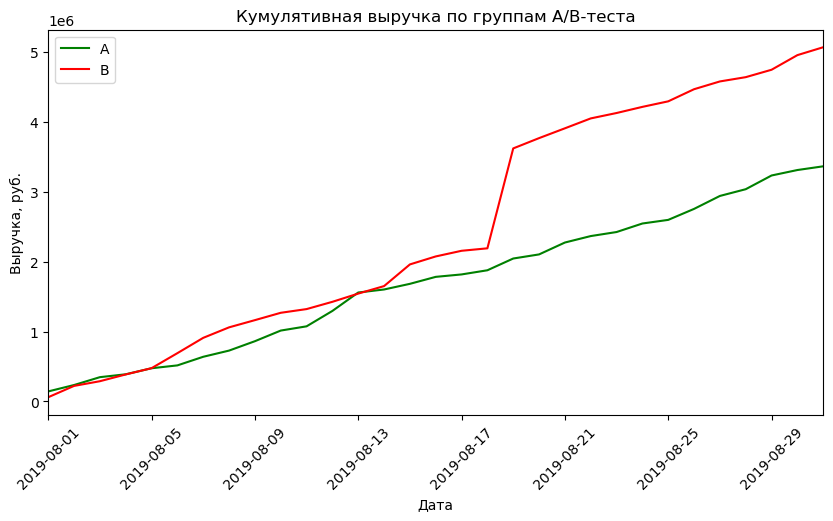

In [20]:
plt.figure(figsize=(10, 5))
plt.title('Кумулятивная выручка по группам А/В-теста')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A', color='g')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B', color='r')
plt.xlabel('Дата')
plt.ylabel('Выручка, руб.')
plt.xticks(rotation=45)
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.legend()
plt.show()

<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Кумулятивная выручка почти линейно увеличивается в обеих группах за период проведения А/В-теста. 
- Имеется резкий скачок выручки группы В, в следствии появления либо очень крупного заказа, либо резкого увеличения количества заказов 

</div>

### Построим график кумулятивного среднего чека по группам A/B-теста.

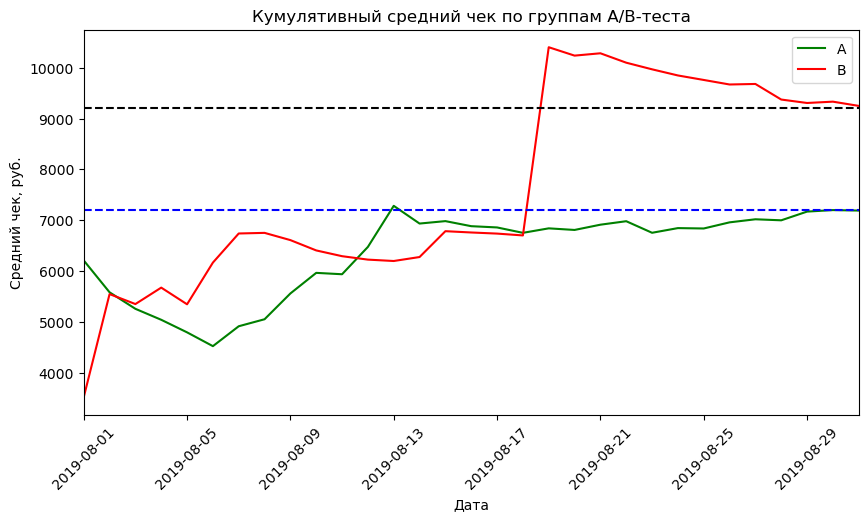

In [21]:
plt.figure(figsize=(10, 5))
plt.title('Кумулятивный средний чек по группам А/В-теста')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']
         / cumulativeRevenueA['order'], label = 'A', color='g')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']
         / cumulativeRevenueB['order'], label = 'B', color='r')
plt.xlabel('Дата')
plt.ylabel('Средний чек, руб.')
plt.axhline(y=9200, color='black', linestyle='--')
plt.axhline(y=7200, color='blue', linestyle='--')
plt.xticks(rotation=45)
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.legend()
plt.show()

<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Кумулятивный средний чек в группе А в начальном периоде проведения теста падал, а затем пошел в рост, во второй части теста он стабилизировался;
- А вот кумулятивный средний чек в группе В показал наличие скачка в тот же момент, что и кумулятивная выручка. После резкого скачка тендеция к снижению;
- На конец периода средний чек группы В отличается от среднего чека группы А более чем на `20%`. 
  
</div>

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

**Объединим кумулятивные данные в одной таблице и присвоим ее столбцам названия в соответствии с группой.**

In [22]:
cumulativeDataAB = cumulativeRevenueA.merge(cumulativeRevenueB,
                                            left_on='date', right_on='date', how='left',
                                            suffixes=['A', 'B'])
cumulativeDataAB.head()

,date,revenueA,orderA,revenueB,orderB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89


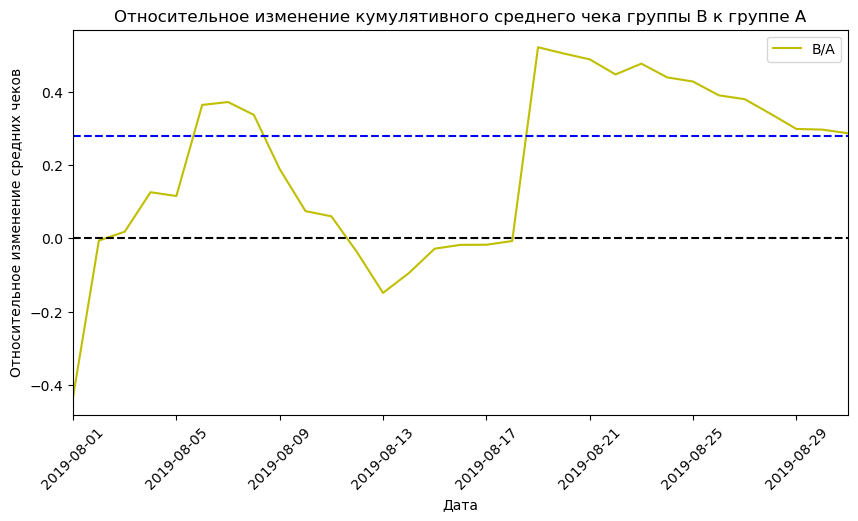

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.plot(cumulativeDataAB['date'], (cumulativeDataAB['revenueB']
         / cumulativeDataAB['orderB']) / (cumulativeDataAB['revenueA']
         / cumulativeDataAB['orderA']) - 1, label = 'B/A', color='y')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение средних чеков')
plt.xticks(rotation=45)
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.28, color='blue', linestyle='--')
plt.legend()
plt.show()

<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Относительное изменение кумулятивного среднего чека группы В к группе А в нескольких точках имеет скачки, что скорее всего говорит об аномальных стоимостях заказов
- На конец периода средний чек группы В стабильно выше среднего чека группы А. 
  
</div>

### Построим  график кумулятивного среднего количества заказов на посетителя по группам A/B-теста.

**Посчитаем среднее количества заказов на посетителя в разрезе групп А/В-теста.**

In [24]:
cumulativeData['conversion'] = cumulativeData['order'] / cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']
cumulativeData.head()

,date,group,order,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


**Построим графики среднего количества заказов на посетителя.**

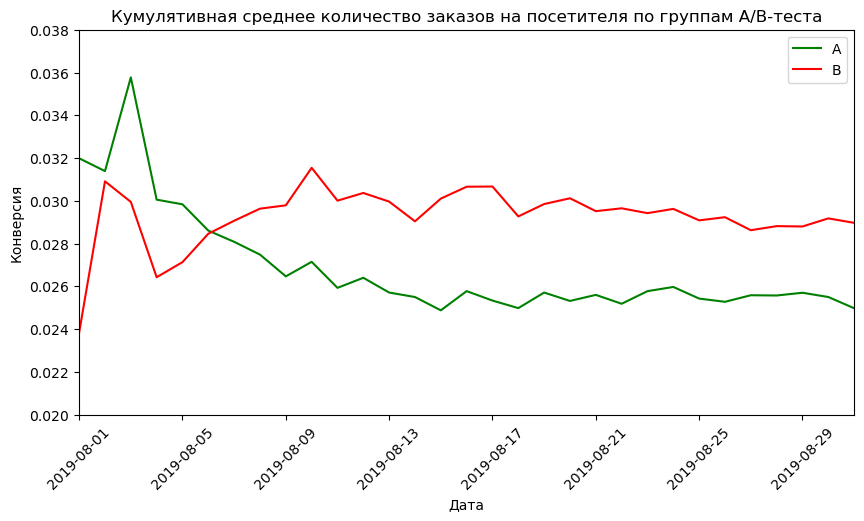

In [25]:
plt.figure(figsize=(10, 5))
plt.title('Кумулятивная среднее количество заказов на посетителя по группам А/В-теста')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A', color='g')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B', color='r')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.xticks(rotation=45)
plt.ylim(0.02, 0.038)
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.legend()
plt.show()

<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- В начале теста были колебания среднего количества заказов на посетителя в обеих группах;
- Затем среднее количество заказов на посетителя группы B начала расти и стабилизировалась к концу теста;
- Среднее количество заказов на посетителя группы А просела относительно первоначальных значений и также стабилизировалась;
   
  
</div>

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

In [26]:
cumulativeConversionAB = cumulativeDataA[['date', 'conversion']]\
.merge(cumulativeDataB[['date', 'conversion']],
       left_on='date', right_on='date', how='left',
       suffixes=['A', 'B'])
cumulativeConversionAB.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


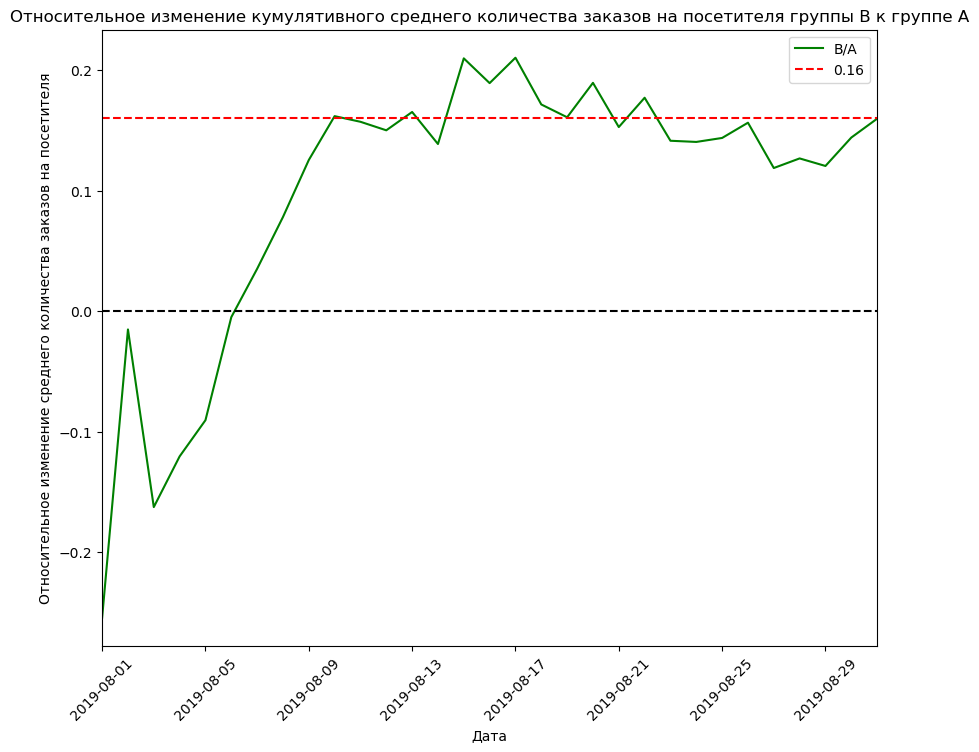

In [27]:
plt.figure(figsize=(10, 8))
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.plot(cumulativeConversionAB['date'], (cumulativeConversionAB['conversionB'] 
        / cumulativeConversionAB['conversionA']) - 1, label = 'B/A', color='g')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества заказов на посетителя')
plt.xticks(rotation=45)
plt.xlim(dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31))
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='red', linestyle='--', label='0.16')
plt.legend()
plt.show()


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Относительное изменение кумулятивного среднего количества заказов на посетителя группы В к группе А в начальном периоде имеет скачкообразное поведение от подъема до резкого падения. После этого примерно с 3-го дня теста наблюдаем довольно резкий рост среднего количества заказов на посетителя группы В относительно группы А.  
- С середины периода наблюдается постепенное снижение относительного среднего количества заказов на посетителя группы В к А и затем стабилизация в районе `плюс 12-16%`. 
  
</div>

### Построим  точечный график количества заказов по пользователям.

**Подсчитаем количество заказов по пользователям.**

In [28]:
ordersByUsers = orders.groupby('user_id', as_index=False)\
.agg({'order_id' : 'nunique'})\
.sort_values(by='order_id', ascending=False)
ordersByUsers.head()

,user_id,order_id
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


**Построим гистрограмму распределения количества заказов на одного пользователя.**

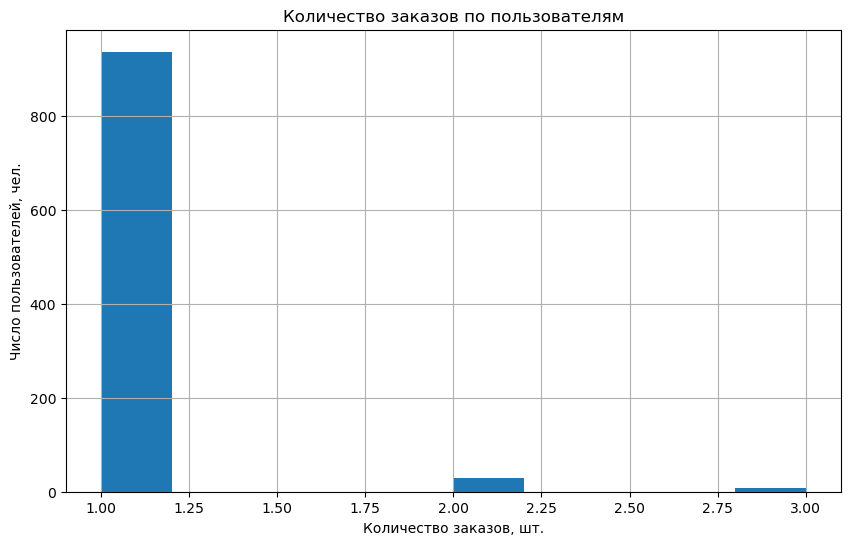

In [29]:
plt.figure(figsize=(10, 6))
ordersByUsers['order_id'].hist()
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество заказов, шт.')
plt.ylabel('Число пользователей, чел.')
plt.show()

**Построим точечную диаграмму числа заказов на одного пользователя.**

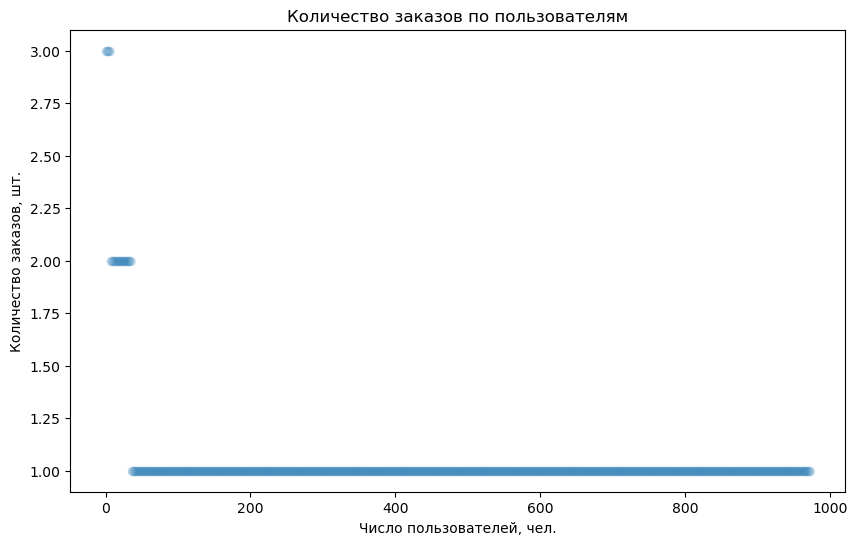

In [30]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 6))
plt.scatter(x_values, ordersByUsers['order_id'], alpha=0.1) 
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов, шт.')
plt.xlabel('Число пользователей, чел.')
plt.show()


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Основная масса пользователей совершала по `1 заказу`;
- Также определенное количество пользователей совершало от `2 до 3 заказов`;
- Для определения аномалий посчитаем перцентили.
 
</div>

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [31]:
print(np.percentile(ordersByUsers['order_id'], [95, 97, 99])) 

[1. 2. 2.]


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
   
- После подсчета перцентилей получаем следующее: `2 заказа` делали менее `3%` пользователей;
- Выберем нижнюю границу для определения аномальных пользователей - `2 заказа` на одного пользователя.
    
  
</div>

### Построим точечный график стоимостей заказов.

**Поcмотрим стоимость заказов по пользователям.**

In [32]:
display(orders.sort_values(by='revenue', ascending=False).head(10))

,order_id,user_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A
949,1347999392,887908475,2019-08-21,60450,A
940,2420050534,4003628586,2019-08-08,58550,B
131,3163614039,2254586615,2019-08-22,53904,A


**Построим точечную диаграмму стоимостей заказов.**

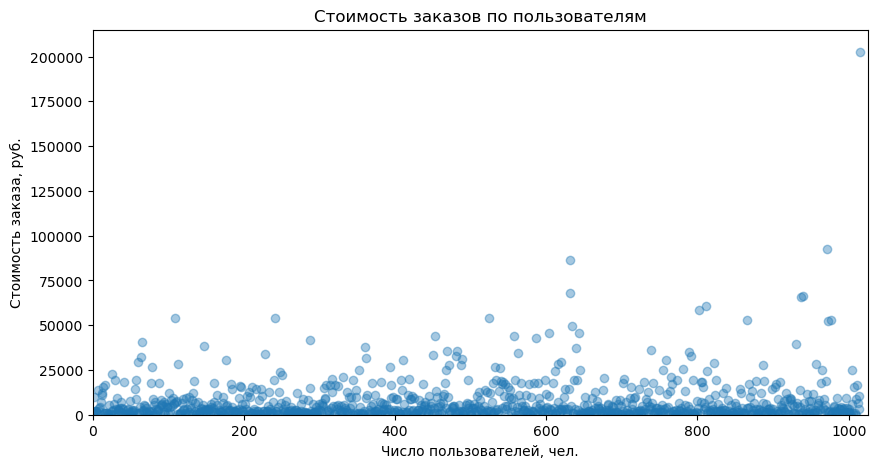

In [33]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], alpha=0.4) 
plt.title('Стоимость заказов по пользователям')
plt.ylabel('Стоимость заказа, руб.')
plt.xlabel('Число пользователей, чел.')
plt.ylim(0, 215000)
plt.xlim(0, 1025)
plt.show()

<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Основная масса пользователей совершала заказы на сумму до `10 000 руб.`;
- Есть  пользователи совершавшие покупку на сумму от `25 000 до 75 000 руб.`;
- Имеем также два очень аномальных выброса по стоимости `1 294 500 и 202 740 руб.`;
- Для определения аномалий посчитаем перцентили.
 
</div>

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [34]:
print(np.percentile(orders['revenue'], [95, 97, 99])) 

[26785. 34792. 53904.]


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- После подсчета перцентилей получаем следующее: заказы на сумму свыше `26 785 руб.` составляют не более `5%`  и на сумму более `58 233.2 руб.` не более `1%` от общего числа заказов;
- Выберем нижнюю границу для определения аномальных заказов - `34 792 руб.`. Все, что свыше этой стоимости будем считать аномальными заказами.
    
  
</div>

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - различий в среднем количестве заказов на посетителя между группами А и В по «сырым» данным нет.**

**Альтернативная гипотеза $H_{1}$ - различия в среднем количестве заказов на посетителя между группами А и В «сырым» данным есть.**

**Соответственно, если нулевая гипотеза $H_{0}$ будет отвергнута, различия в среднем количестве заказов на посетителя между группами А и В «сырым» данным есть.**

**Для расчета статистической значимости различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами нам необходимо подготовить имеющиеся данные. Сформируем новый датафрейм `data` со следующими столбцами:**

- `ordersPerDateA` — количество заказов в выбранную дату в группе A;

- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;

- `ordersPerDateB` — количество заказов в выбранную дату в группе B;

- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;

- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;

- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;

- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;

- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;

- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;

- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;

- `visitorsCummulativeA`— количество пользователей до выбранной даты включительно в группе A;

- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [35]:
# Коэффициент статистической значимости примем в 5%
alpha = 0.05

# Посчитаем количество посетителей на выбранную дату в группах А и В

visitorsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Посчитаем кумулятивное количество посетителей до выбранной даты включительно в группах А и В

visitorsCummulativeA = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date']
                        <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsCummulativeA.columns = ['date', 'visitorsCummulativeA']


visitorsCummulativeB = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date']
                        <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1)
visitorsCummulativeB.columns = ['date', 'visitorsCummulativeB']

# Посчитаем количество заказов и выручку на выбранную дату в группах А и В

ordersADaily = (orders[orders['group'] == 'A']
                [['date', 'order_id','user_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (orders[orders['group'] == 'B']
                [['date', 'order_id','user_id', 'revenue']]
                .groupby('date', as_index=False)
                .agg({'order_id': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Посчитаем кумулятивные количество заказов и выручку до выбранной даты включительно в группах А и В

ordersCummulativeA = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date']
                    <= x['date']].agg({'date': 'max', 'ordersPerDateA': 'sum', 
                    'revenuePerDateA': 'sum'}),axis=1).sort_values(by=['date'])
ordersCummulativeA.columns = ['date', 
                              'ordersCummulativeA',
                              'revenueCummulativeA']

ordersCummulativeB = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date']
                    <= x['date']].agg({'date': 'max', 'ordersPerDateB': 'sum', 
                    'revenuePerDateB': 'sum'}),axis=1).sort_values(by=['date'])
ordersCummulativeB.columns = ['date', 
                              'ordersCummulativeB',
                              'revenueCummulativeB']
# Сформируем новый датафрейм `data`, объединив все предыдущие датафреймы

data = (ordersADaily.merge(ordersBDaily, left_on='date',
                           right_on='date', how='left')
    .merge(ordersCummulativeA, left_on='date', right_on='date', how='left')
    .merge(ordersCummulativeB, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsCummulativeA, left_on='date', right_on='date', how='left')
    .merge(visitorsCummulativeB, left_on='date', right_on='date', how='left'))

display(data.head()) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [36]:
# Сформируем датафреймы в которых указано число совершённых заказов
# для пользователей, которые заказывали хотя бы 1 раз
ordersByUsersA = (orders[orders['group'] == 'A']
                  .groupby('user_id', as_index=False)
                  .agg({'order_id': pd.Series.nunique}))
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B']
                  .groupby('user_id', as_index=False)
                  .agg({'order_id': pd.Series.nunique}))
ordersByUsersB.columns = ['user_id', 'orders']

# Объявим переменные sampleA и sampleB, в которых пользователям
# из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. 
# Это нужно для подготовки выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0,
                    index=np.arange(data['visitorsPerDateA'].sum()
                    - len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0,
                    index=np.arange(data['visitorsPerDateB'].sum()
                    - len(ordersByUsersB['orders'])), name='orders')], axis=0)

pvalue = stats.mannwhitneyu(sampleA, sampleB,alternative = 'two-sided')[1]

print("p-value по среднему количеству заказов на посетителя по «сырым» данным: {0:.3f}".format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Относительное различие среднего количества заказов на посетителя группы B к группе A: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))  

p-value по среднему количеству заказов на посетителя по «сырым» данным: 0.011
Отвергаем нулевую гипотезу
Относительное различие среднего количества заказов на посетителя группы B к группе A: 0.160


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
   
- `p-value = 0.011` это меньше принятого коэффициента статистической значимости в `5%`. 
- Отвергаем нулевую гипотезу об отсутствии различий по «сырым» данным в конверсии между группами. 
- Средняя конверсия «сырым» данным группы В больше средней конверсии «сырым» данным группы А на `16.0%`.
    
  
</div>

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - различий в среднем чеке заказа между группами А и В «сырым» данным нет.**

**Альтернативная гипотеза $H_{1}$ - различия в среднем чеке заказа между группами А и В «сырым» данным есть.**

**Соответственно, если нулевая гипотеза $H_{0}$ будет отвергнута, различия в среднем чеке заказа между группами А и В «сырым» данным есть.**

In [37]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, 
# передадим критерию mannwhitneyu() данные о выручке с заказов.

pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                            orders[orders['group']=='B']['revenue'],
                            alternative = 'two-sided')[1]

print("p-value по среднему чеку заказа по «сырым» данным: {0:.3f}".format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Относительное различие среднего чека группы B к группе A по «сырым» данным: {0:.3f}"
      .format(orders[orders['group']=='B']['revenue'].mean()
      /orders[orders['group']=='A']['revenue'].mean()-1))


p-value по среднему чеку заказа по «сырым» данным: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека группы B к группе A по «сырым» данным: 0.287


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- Мы наблюдаем следующее - средний чек заказа по «сырым» данным группы В больше среднего чека заказа по «сырым» данным группы А на `28.7%`, но этот показатель не является статистически значимым исходя из того, что 
 `p-value = 0.829` больше принятого коэффициента статистической значимости в `5%`и соответсвенно не получилось отвергнуть нулевую гипотезу об отсутствии различий по «сырым» данным в среднем чеке заказа между группами.
  
</div>

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя (конверсии) между группами  по «очищенным» данным.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - различий в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным нет.**

**Альтернативная гипотеза $H_{1}$ - различия в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным есть.**

**Соответственно, если нулевая гипотеза $H_{0}$ будет отвергнута, различия в среднем количестве заказов на посетителя между группами А и В по «очищенным» данным есть.**

**Ранее, мы посчитали `95-й и 99-й перцентили`  количества заказов на пользователя и стоимости заказов, и приняли за аномальных пользователей тех, кто совершил от `2 заказов` или совершил заказ дороже `34 792 рублей`. Так мы уберём около 1% пользователей с наибольшим числом заказов и от 3% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше `2` — `usersWithManyOrders` и пользователей, совершивших заказы дороже `34 792 рублей` — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.**

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']],axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 34792]['user_id']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)\
                 .drop_duplicates().sort_values())

print(abnormalUsers.head())
print('Количество аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
33      249864742
684     358944393
648     382846391
58      611059232
Name: user_id, dtype: int64
Количество аномальных пользователей: 38


In [39]:
# Подготовим выборки количества заказов по пользователям по группам теста:
sampleFilteredA = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id']\
                            .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(
                            data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
                            name='orders')], axis=0)

sampleFilteredB = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id']\
                            .isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(
                            data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
                            name='orders')], axis=0)

pvalue = stats.mannwhitneyu(sampleFilteredA, sampleFilteredB, alternative = 'two-sided')[1]

print("p-value по конверсии по «очищенным» данным: {0:.3f}".format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print("Относительное различие средней конверсии  по «очищенным» данным группы B к группе A: {0:.3f}"\
      .format(sampleFilteredB.mean() / sampleFilteredA.mean() - 1)) 

p-value по конверсии по «очищенным» данным: 0.006
Отвергаем нулевую гипотезу
Относительное различие средней конверсии  по «очищенным» данным группы B к группе A: 0.197


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
   
- `p-value = 0.006` это меньше принятого коэффициента статистической значимости в `5%`. 
- Отвергаем нулевую гипотезу об отсутствии различий по «очищенным» данным в среднем количестве заказов на посетителя между группами.
- Статистически значимые различия в среднем количестве заказов на посетителя по группам тестирования по «очищенным» данным есть;
- Среднее количестве заказов на посетителя по «очищенным» данным группы В больше в среднего количества заказов на посетителя по «очищенным» данным группы А на `19.7%`.
    
  
</div>

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

**Определим гипотезы:**

**Нулевая гипотеза $H_{0}$ - различий в среднем чеке заказа между группами А и В по «очищенным» данным нет.**

**Альтернативная гипотеза $H_{1}$ - различия в среднем чеке заказа между группами А и В по «очищенным» данным есть.**

**Соответственно, если нулевая гипотеза $H_{0}$ будет отвергнута, различия в среднем чеке заказа между группами А и В по «очищенным» данным есть.**

In [40]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, 
# передадим критерию mannwhitneyu() данные о выручке с заказов за исключением аномалий.

pvalue = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                            np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'], 
                            orders[np.logical_and(orders['group'] == 'B',
                            np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'])[1]


print("p-value по среднему чеку заказа по «очищенным» данным: {0:.3f}".format(pvalue))
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print("Относительное различие среднего чека группы B к группе A по «очищенным» данным: {0:.3f}"
             .format(orders[np.logical_and(orders['group'] == 'B',
             np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean()
             / orders[np.logical_and(orders['group'] == 'A',
             np.logical_not(orders['user_id'].isin(abnormalUsers)))]['revenue'].mean()- 1))



p-value по среднему чеку заказа по «очищенным» данным: 0.918
Не получилось отвергнуть нулевую гипотезу
Относительное различие среднего чека группы B к группе A по «очищенным» данным: 0.016


<div style="background:#AFEEEE; color:#000080; padding:10px">
  <b>Вывод:</b>
    
- По «очищенным» данным, как и по «сырым» данным средний чек заказа группы В больше среднего чека заказа группы А правда всего лишь на `1.6%`, но и этот показатель не является статистически значимым исходя из того, что 
 `p-value = 0.918` больше принятого коэффициента статистической значимости в `5%`и соответсвенно не получается отвергнуть нулевую гипотезу об отсутствии различий по «очищенным» данным в среднем чеке заказа между группами.
  
</div>

### Примем решение по результатам теста.

**Имеем следующие факты:**

***Статистически значимое различие в среднем количестве заказов на посетителя между группами А и В присутствует как по «сырым» данным, так и по «очищенным» данным*** 
- `p-value = 0.011` по «сырым» данным это меньше принятого коэффициента статистической значимости в `5%`. 
- `p-value = 0.006` по «очищенным» даннымэто меньше принятого коэффициента статистической значимости в `5%`. 

- Среднее количество заказов на посетителя на посетителя по «сырым» данным группы В больше чем у группы А на `16.0%`.
- Среднее количество заказов на посетителя по «очищенным» данным группы В больше чем у группы А на `19.7%`.

***Статистически значимое различие в среднем чеке между группами А и В отсутствует как по «сырым» данным, так и по «очищенным» данным***
- `p-value = 0.829` по «сырым» данным это больше принятого коэффициента статистической значимости в `5%`; 
- `p-value = 0.918` по «очищенным» данным это больше принятого коэффициента статистической значимости в `5%`; 

- Средний чек заказа по «сырым» данным группы В больше среднего чека заказа по «сырым» данным группы А на `28.7%`.
- Средний чек заказа по «очищенным» данным группы В больше среднего чека заказа по «очищенным» данным группы А на `1.6%`.

***График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе А показывает, что результаты группы B явно лучше группы A и есть тенденция к улучшению относительной разницы. Это показывает и среднее количество заказов на посетителя по «сырым» и «очищенным» данным.***

***График относительного изменения кумулятивного среднего чека группы B к группе A по «сырым» данным колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя. По «очищенным» данным средний чек группы B к группе A явно уменьшается и стремится к нулю.***


**На основании вышеизложенного:**

***Несмотря на отсутствие статистической значимости по среднему чеку между группами, группа В значимо лучше группы А по среднему количеству заказов на посетителя. Среднее количество заказов на посетителя сильно влияет на выручку. Рекомендую завершить тест и зафиксировать победу группы В.***

## Итоговый вывод.

<div style="background:#00FA9A; color:#000080; padding:10px">
  <b>Итоговый вывод:</b>

**Изучили общую информацию о данных**
- Пропущенных значений нет;
- Неоходимо привести названия столбцов датафреймов `hypotheses` и `orders` правильному стилю;
- Обнаружен некорректный тип данных `orders`, `visits`;
- Явные дубликаты отсутствуют;
- Обнаружены `user_id`, которые встречаются в обоих группах А и В в `orders`;
- Данные признаны полными и достаточными для исследования.
    
**В процессе предобработки данных было сделано следующее:**
    
- привели названия столбцов к нижнему регистру и разделили обозначения нижним подчеркиванием;
- поменяли тип данных в столбце `date`;
- удалили строки с пользователями, которые присутствуют в обоих группах А и В;
    
**Проведена приоритизация гипотез:**
   
    
***ТОП - 3 перспективных гипотез согласно обоим фреймворкам `ICE` и `RICE` и тепловой карте:***
    
-  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок `Гипотеза № 7`; 

-  Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей `Гипотеза № 0`

-  Запустить акцию, дающую скидку на товар в день рождения `Гипотеза № 8`;

**Проведен анализ результатов А/В-теста:**
    
- Кумулятивная выручка почти линейно увеличивается в обеих группах за период проведения А/В-теста; 
- На конец периода средний чек группы В отличается от среднего чека группы А более чем на `20%`;
- С середины периода наблюдается постепенное снижение относительной конверсии группы В к А и затем стабилизация в районе `плюс 12-16%`;
- Основная масса пользователей совершала по `1 заказу`;
- После подсчета перцентилей получаем следующее: `2 заказа` делали менее `3%` пользователей;
- Основная масса пользователей совершала заказы на сумму до `10 000 руб.`;
- После подсчета перцентилей получаем следующее: заказы на сумму свыше `26 785 руб.` составляют не более `5%`  и на сумму более `58 233.2 руб.` не более `1%` от общего числа заказов;
    
**Проведен статистичекий анализ результатов А/В-теста:**
    
***Статистически значимое различие по конверсии между группами А и В присутствует как по «сырым» данным, так и по «очищенным» данным*** 
- `p-value = 0.011` по «сырым» данным это меньше принятого коэффициента статистической значимости в `5%`. 
- `p-value = 0.006` по «очищенным» даннымэто меньше принятого коэффициента статистической значимости в `5%`. 

- Средняя конверсия по «сырым» данным группы В больше чем у группы А на `16.0%`.
- Средняя конверсия по «очищенным» данным группы В больше чем у группы А на `19.7%`.
    
    
***Статистически значимое различие в среднем чеке между группами А и В отсутствует как по «сырым» данным, так и по «очищенным» данным***
- `p-value = 0.829` по «сырым» данным это больше принятого коэффициента статистической значимости в `5%`; 
- `p-value = 0.918` по «очищенным» данным это больше принятого коэффициента статистической значимости в `5%`; 

- Средний чек заказа по «сырым» данным группы В больше среднего чека заказа по «сырым» данным группы А на `28.7%`.
- Средний чек заказа по «очищенным» данным группы В больше среднего чека заказа по «очищенным» данным группы А на `1.6%`.

*График относительного изменения кумулятивной конверсии группы B к группе А показывает, что результаты группы B явно лучше группы A и есть тенденция к улучшению относительной разницы. Это показывает и средняя конверсия по «сырым» и «очищенным» данным.*

*График относительного изменения кумулятивного среднего чека группы B к группе A по «сырым» данным колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя. По «очищенным» данным средний чек группы B к группе A явно уменьшается и стремится к нулю.*


**На основании вышеизложенного:**

***Несмотря на отсутствие статистической значимости по среднему чеку между группами, группа В значимо лучше группы А по конверсии. Конверсия сильно влияет на выручку. Рекомендую завершить тест и зафиксировать победу группы В.***